<a href="https://colab.research.google.com/github/LucaMorocco/Luca-s-room/blob/main/Coding_School_data_science_project_Baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import datasets, model_selection, metrics
from sklearn.preprocessing import StandardScaler
# Research question- What makes hall of fame players so great, and can we predict who will become one?

Functions and Libraries import

In [ ]:
from google.colab import files
uploaded = files.upload()

#Base ball data set from caggle upload

In [ ]:
df_one = pd.read_csv('/content/500hits.csv',encoding = 'latin-1')
df_one.head()

In [ ]:
df_one.info()
#It seems like there are no missing values,
#but there are probably incorrect values
# I saw a zero in RBIs, so definitly need to find zeros.

In [ ]:
df_one.describe()
#There are no missing values, but there are some zeros in the RBI category and the strikeout category that need to be fixed.

In [ ]:
df_one.columns

In [ ]:
rename={"PLAYER":"Player","YRS":"Years Played", "G":"Games Played",
        "AB":"At Bats","R":"Runs","H":"Hits","2B":"Doubles","3B":"Triples",
        "HR":"Home Runs","RBI":"Runs Batted In","BB":"Walks"
        ,"SO":"Strike Outs","SB":"Stolen Bases","CS":"Caught Stolen",
        "BA":"Batting Average","HOF":"Hall of Fame"}
df_one = df_one.rename(columns= rename)
df_one.head()

In [ ]:
# I am going to try to start finding the missing data and replacing it.
df_one[(df_one['Runs Batted In']<100)]
#looks like Runs batted in category is unusable unless
#I manually replace all the values or drop the rows with zeros.


In [ ]:
#This will be for strikeouts
df_one[(df_one['Strike Outs']<115)]
# Strikeouts cannot be use either because the data is incomplete for players
# that played in the early 20th or late 19th century
#Joe Sewell had the lowest strike out percentage so its safe to say
#that most of these numbers are incomplete.

In [ ]:
df_one[(df_one['Caught Stolen']<1)]
#Too many zeros here too so this column must be dropped as well or all players with zeros must be dropped

In [ ]:
df_one[(df_one['Hall of Fame']> 1)]
# obviously this value is incorrect should be a one



In [ ]:
df_one= df_one.drop(columns = ['Runs Batted In','Strike Outs', 'Caught Stolen'], axis = 1)
df_one.head()

In [ ]:
df_one.iloc[160,12]=1
df_one.iloc[160,12]
#Fixed that datapoint

I am going to start creating a bunch of different graphs to investigate my data and see if I can discover any trends

In [ ]:
#this data suggests that more at bats will lead to more hits
plt.scatter(df_one['At Bats'],df_one['Hits'], alpha = 0.5)
plt.title("At Bats vs Hits in Professional Baseball Players")
plt.xlabel("At Bats")
plt.ylabel("Hits")
plt.show()

In [ ]:
plt.scatter(df_one['At Bats'],df_one['Doubles'], alpha = 0.5, color = "orange")
plt.title("At Bats vs Doubles in Professional Baseball Players")
plt.xlabel("At Bats")
plt.ylabel("Doubles")
plt.show()
# A decently linear relationship

In [ ]:
# doubles conform a lot more to the tend of more hits = more doubles
plt.scatter(df_one['Hits'],df_one['Doubles'], alpha = 0.5)
plt.title("Hits vs Doubles in Professional Baseball Players")
plt.xlabel("Hits")
plt.ylabel("Doubles")
plt.show()

In [ ]:
#Its seems like Triples go against the trend of more at hits= more triples, but less severely than home runs
plt.scatter(df_one['Hits'],df_one['Triples'], alpha= 0.5)
plt.title("Hits vs Triples in Professional Baseball Players")
plt.xlabel("Hits")
plt.ylabel("Triples")
plt.show()

In [ ]:
plt.scatter(df_one['At Bats'],df_one['Triples'], alpha = 0.5, color = "orange")
plt.title("At Bats vs Triples in Professional Baseball Players")
plt.xlabel("At Bats")
plt.ylabel("Triples")
plt.show()
# Like with hits, there is definitly more of a random spread of the data than in the case of doubles

In [ ]:
# It seems like Home runs go against the trend more hits = more home runs
plt.scatter(df_one['Hits'],df_one['Home Runs'], alpha = 0.5)
plt.title("Hits vs Home Runs in Professional Baseball Players")
plt.xlabel("Hits")
plt.ylabel("Home Runs")
plt.show()

In [ ]:
plt.scatter(df_one['At Bats'],df_one['Home Runs'], alpha = 0.5, color = "orange")
plt.title("At Bats vs Home Runs in Professional Baseball Players")
plt.xlabel("At Bats")
plt.ylabel("Home Runs")
plt.show()

Now I am going to add in hall of fame to the plots to see if any patterns emerge

In [ ]:
# This plot is interesting because it shows that players with a high batting average and/or a lot of games played are more likely
# to be inducted into the hall of fame

plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Games Played'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Games Played'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between games played and batting average in profesional baseball players")
plt.xlabel('Games Played')
plt.ylabel('Batting Average')
plt.legend()
plt.show()

These graphs are all Batting average in the Y

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['At Bats'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['At Bats'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between at bats and batting average in profesional baseball players")
plt.xlabel('At Bats')
plt.ylabel('Batting Average')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Hits'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Hits'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Hits and Batting Average in profesional baseball players")
plt.xlabel('Hits')
plt.ylabel('Batting Average')
plt.legend()
plt.show()

These Graphs have Hits i the Y

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Games Played'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Games Played'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Games played and Batting Average in profesional baseball players")
plt.xlabel('Games Played')
plt.ylabel('Batting Average')
plt.legend()
plt.show()
# this plot is super interesting because it suggests that once again longevity is important for hall of fame players. It also
# hints that there are other factors that determine if you go to the hall of fame because there is a large overlap betweeen HOF
#and Non HOF players

These Graphs have Doubles in the Y

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['At Bats'],df_one[df_one['Hall of Fame'] == 1]
 ['Doubles'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['At Bats'],df_one[df_one['Hall of Fame'] == 0]
 ['Doubles'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between at bats and doubles in profesional baseball players")
plt.xlabel('At Bats')
plt.ylabel('Doubles')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Hits'],df_one[df_one['Hall of Fame'] == 1]
 ['Doubles'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Hits'],df_one[df_one['Hall of Fame'] == 0]
 ['Doubles'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between hits and doubles in profesional baseball players")
plt.xlabel('Hits')
plt.ylabel('Doubles')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Batting Average'],df_one[df_one['Hall of Fame'] == 1]
 ['Doubles'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Batting Average'],df_one[df_one['Hall of Fame'] == 0]
 ['Doubles'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Batting Average and Doubles in profesional baseball players")
plt.xlabel('Batting Average')
plt.ylabel('Doubles')
plt.legend()
plt.show()

These graphs have triples

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Hits'],df_one[df_one['Hall of Fame'] == 1]
 ['Triples'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Hits'],df_one[df_one['Hall of Fame'] == 0]
 ['Triples'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Hits and Triples in profesional baseball players")
plt.xlabel('Hits')
plt.ylabel('Triples')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['At Bats'],df_one[df_one['Hall of Fame'] == 1]
 ['Triples'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['At Bats'],df_one[df_one['Hall of Fame'] == 0]
 ['Triples'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between at bats and Triples in profesional baseball players")
plt.xlabel('At Bats')
plt.ylabel('Triples')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Batting Average'],df_one[df_one['Hall of Fame'] == 1]
 ['Triples'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Batting Average'],df_one[df_one['Hall of Fame'] == 0]
 ['Triples'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Batting Average and Triples in profesional baseball players")
plt.xlabel('Batting Average')
plt.ylabel('Triples')
plt.legend()
plt.show()

These graphs have Home Runs

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['At Bats'],df_one[df_one['Hall of Fame'] == 1]
 ['Home Runs'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['At Bats'],df_one[df_one['Hall of Fame'] == 0]
 ['Home Runs'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between at bats and Home Runs in profesional baseball players")
plt.xlabel('At Bats')
plt.ylabel('Home Runs')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Hits'],df_one[df_one['Hall of Fame'] == 1]
 ['Home Runs'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Hits'],df_one[df_one['Hall of Fame'] == 0]
 ['Home Runs'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Hits and Home Runs in profesional baseball players")
plt.xlabel('Hits')
plt.ylabel('Home Runs')
plt.legend()
plt.show()

In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Batting Average'],df_one[df_one['Hall of Fame'] == 1]
 ['Home Runs'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Batting Average'],df_one[df_one['Hall of Fame'] == 0]
 ['Home Runs'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Batting Average and Home Runs in profesional baseball players")
plt.xlabel('Batting Average')
plt.ylabel('Home Runs')
plt.legend()
plt.show()

I want to see the spreads of HOF and Non HOF batting averages.

In [ ]:

hof = [df_one[df_one['Hall of Fame'] == i]['Batting Average'] for i in range(2)]

plt.boxplot(hof, labels=['Non Hall of Fame','Hall of Fame'])

plt.title("Batting Average distributions in HOF vs non HOF")
plt.ylabel('Batting Average')

plt.show()


In [ ]:
hof = [df_one[df_one['Hall of Fame'] == i]['Hits'] for i in range(2)]

plt.boxplot(hof, labels=['Non Hall of Fame','Hall of Fame'])

plt.title("Hit distributions in HOF vs non HOF")
plt.ylabel('Hits')

plt.show()


In [ ]:
plt.scatter(df_one[df_one['Hall of Fame'] == 1]['Games Played'],df_one[df_one['Hall of Fame'] == 1]
 ['Batting Average'], alpha = 0.5, color ='red', label = 'HOF')
plt.scatter(df_one[df_one['Hall of Fame'] == 0]['Games Played'],df_one[df_one['Hall of Fame'] == 0]
 ['Batting Average'], alpha = 0.5, color= "orange", label = 'NON HOF')
plt.title("The relationship between Years played and batting average in profesional baseball players")
plt.xlabel('Years Played')
plt.ylabel('Batting Average')
plt.legend()
plt.show()

I am going to use some T-tests in order to figure out which variables have a signigicant effect on whether or not you make the Hall of Fame

In [ ]:
from scipy import stats


In [ ]:
#T-test for Batting Average.
#Hypothesis- Batting Average affects entry into the HOF
#Null Hypothesis- Batting average has no effect on HOF entry
#P-Value< .05 to reject Null Hypothesis
Hall_fame= df_one[df_one['Hall of Fame'] == 1]['Batting Average']
non_fame= df_one[df_one["Hall of Fame"] == 0]['Batting Average']
t_stat, p_val= stats.ttest_ind(Hall_fame, non_fame)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

if p_val > 0.05:
    print("There is no statistically significant difference in batting averages.")
else:
    print("There is a statistically significant difference between the batting averages.")

In [ ]:
#T-test for Hits
#Hypothesis- number of hits affect entry into the HOF
#Null Hypothesis- number of hits does not affect entry into the Hof
#P-Value< .05 to reject the Null hypothesis
Hall_fame= df_one[df_one['Hall of Fame'] == 1]['Hits']
non_fame= df_one[df_one["Hall of Fame"] == 0]['Hits']
t_stat, p_val= stats.ttest_ind(Hall_fame, non_fame)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

if p_val > 0.05:
    print("There is no statistically significant difference between the hits.")
else:
    print("There is a statistically significant difference between the hits.")

In [ ]:
#T-test for Home Runs
#Hypothesis-number of hits affect entry into the HOF
#Null Hypothesis- number of hits does not affect entry into the HOF
#P-value < .05 to reject the Null Hypothesis
Hall_fame= df_one[df_one['Hall of Fame'] == 1]['Home Runs']
non_fame= df_one[df_one["Hall of Fame"] == 0]['Home Runs']
t_stat, p_val= stats.ttest_ind(Hall_fame, non_fame)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

if p_val > 0.05:
    print("There is no statistically significant difference between the home runs.")
else:
    print("There is a statistically significant difference between the hhome runs.")

In [ ]:
Hall_fame= df_one[df_one['Hall of Fame'] == 1]['Games Played']
non_fame= df_one[df_one["Hall of Fame"] == 0]['Games Played']
t_stat, p_val= stats.ttest_ind(Hall_fame, non_fame)
print(f"T-Stat: {t_stat}, P-Value: {p_val}\n")

if p_val > 0.05:
    print("There is no statistically significant difference between the games played.")
else:
    print("There is a statistically significant difference between the games played.")

In [ ]:
#Because every single value is giving me a low p-value, I am gonna
#try seperating the HOF from non HOF and calculating averages to compare
df_two = df_one.drop(columns = 'Player')
hall_df= df_two[df_two['Hall of Fame']== 1]
non_df= df_two[df_two["Hall of Fame"] == 0]
hall_df.mean()


In [ ]:
hall_df.info()

In [ ]:
non_df.mean()

In [ ]:
non_df.info()

Since Hits and batting average gave a pretty good seperation line between Hall of famers and non hall of famers, I am going to Use K nearest Neighbors with these two variables in order to predict who gets in the hall of fame

In [ ]:
#Standerdize data
scaler = StandardScaler()
df_bb = df_one.dropna()
df_bb2 = scaler.fit_transform(df_bb[['Hits','Batting Average','Home Runs','Runs','Games Played','At Bats']])

In [ ]:
df_bbstd.describe()

In [ ]:
df_bbstd = pd.DataFrame(df_bb2,columns = ["Hits","Batting Average","Home Runs","Runs","Games Played","At Bats"])

In [ ]:

features = df_bb[["Batting Average","Hits"]]
label = df_bb["Hall of Fame"]
label

In [51]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, label, test_size= 0.2, random_state =42)

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
bbmodel = KNeighborsClassifier(n_neighbors= 4)

In [54]:
bbmodel.fit(X_train, y_train)
bbpredict = bbmodel.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,bbpredict))

Accuracy Score:  0.8064516129032258


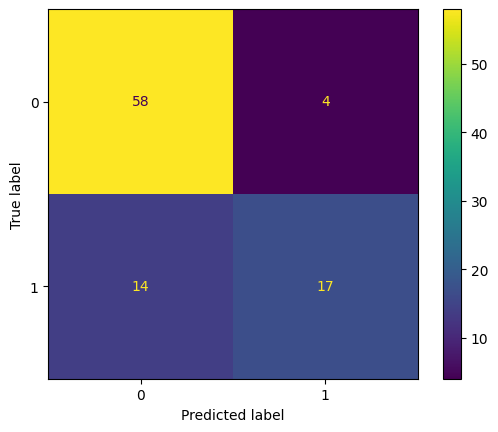

In [55]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,bbpredict)

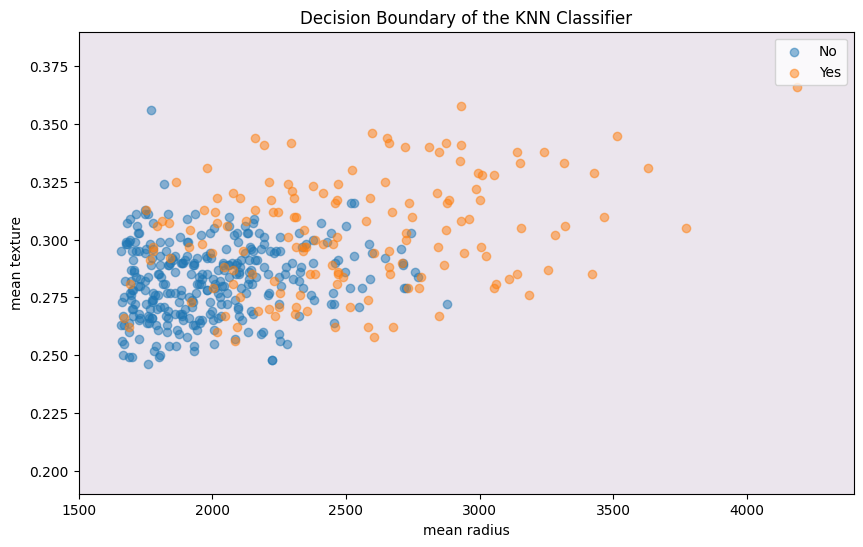

In [56]:
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(1500, 4400, 0.1),
                     np.arange(0.24,0.4, 0.1))
z = bbmodel.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in df_bb.groupby('Hall of Fame'):
  ax.scatter(data["Hits"], data["Batting Average"], label=["No","Yes"][label], alpha=0.5)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
ax.legend()
plt.show()

I am now going to try playing around with different K Values to see wich one is the most accurate.

{1: np.float64(65.59139784946237), 3: np.float64(78.49462365591397), 5: np.float64(82.79569892473118), 7: np.float64(82.79569892473118), 9: np.float64(82.79569892473118), 11: np.float64(84.94623655913979), 13: np.float64(80.64516129032258), 15: np.float64(80.64516129032258), 17: np.float64(81.72043010752688), 19: np.float64(82.79569892473118), 21: np.float64(82.79569892473118), 23: np.float64(83.87096774193549), 25: np.float64(83.87096774193549), 27: np.float64(80.64516129032258), 29: np.float64(80.64516129032258), 31: np.float64(79.56989247311827), 33: np.float64(81.72043010752688), 35: np.float64(82.79569892473118), 37: np.float64(84.94623655913979), 39: np.float64(83.87096774193549), 41: np.float64(83.87096774193549), 43: np.float64(83.87096774193549), 45: np.float64(81.72043010752688), 47: np.float64(81.72043010752688), 49: np.float64(81.72043010752688)}


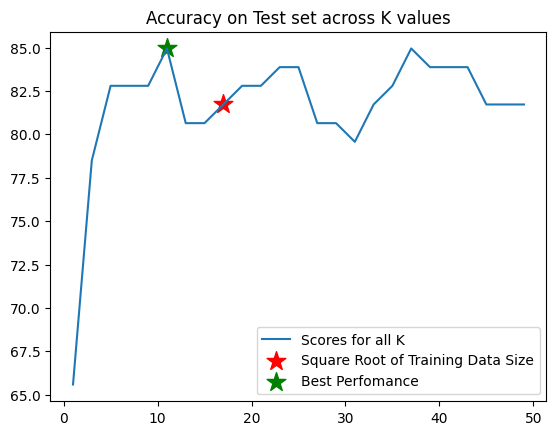

Top score of optimal classifier: 84.94623655913979
Optimal K 11


In [57]:

scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across K values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')


k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Optimal K " + str(best_k))

In [58]:
#best model visualization
BBmodel = KNeighborsClassifier(n_neighbors= 11)
BBmodel.fit(X_train, y_train)
BBpredict = BBmodel.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,BBpredict))

Accuracy Score:  0.8494623655913979


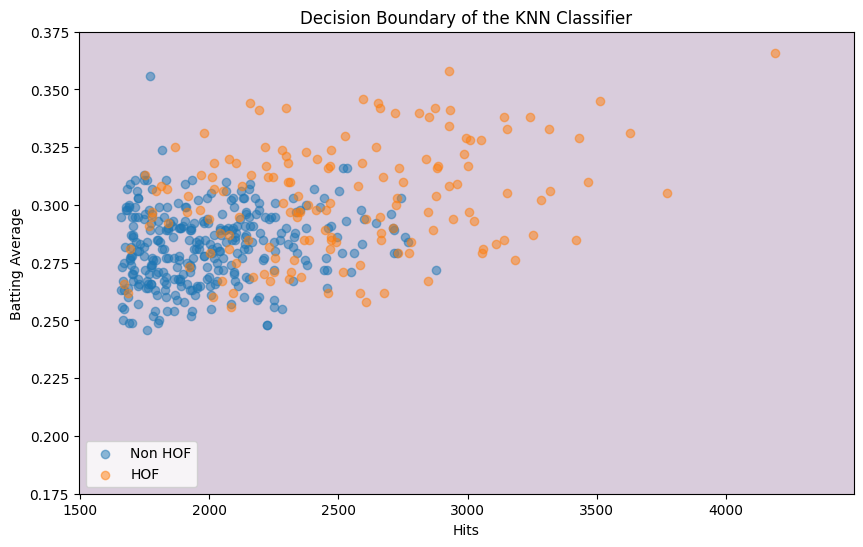

In [59]:
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(1500, 4500, 10),
                     np.arange(0.2, 0.4, 0.05))
z = BBmodel.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.2)

for label, data in df_bb.groupby('Hall of Fame'):
  ax.scatter(data["Hits"], data["Batting Average"], label=["Non HOF","HOF"][label], alpha=0.5)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel("Hits")
ax.set_ylabel("Batting Average")
ax.legend()
plt.show()

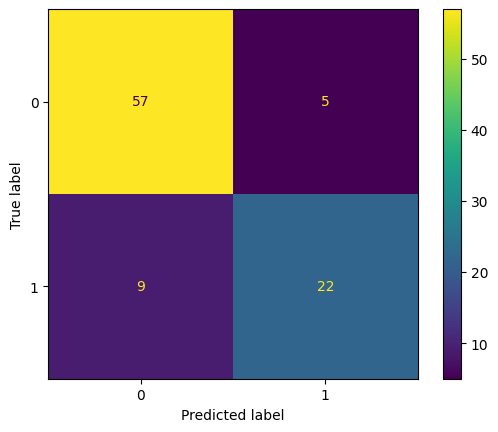

In [60]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,BBpredict)

I am going to make a new model this time with home runs added in

In [61]:
featuresb = df_bb[["Hits","Batting Average","Home Runs"]]
labelb= df_bb["Hall of Fame"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(featuresb, labelb, test_size= 0.2, random_state =42)
bbmodel3v = KNeighborsClassifier(n_neighbors= 49)
bbmodel3v.fit(X_train, y_train)
bb3vpredict = bbmodel3v.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,bb3vpredict))

Accuracy Score:  0.8602150537634409


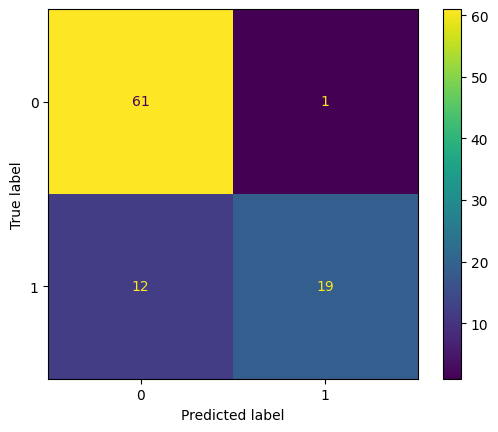

In [62]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,bb3vpredict)

{1: np.float64(73.11827956989248), 3: np.float64(77.41935483870968), 5: np.float64(79.56989247311827), 7: np.float64(79.56989247311827), 9: np.float64(80.64516129032258), 11: np.float64(80.64516129032258), 13: np.float64(81.72043010752688), 15: np.float64(83.87096774193549), 17: np.float64(81.72043010752688), 19: np.float64(82.79569892473118), 21: np.float64(82.79569892473118), 23: np.float64(83.87096774193549), 25: np.float64(83.87096774193549), 27: np.float64(83.87096774193549), 29: np.float64(83.87096774193549), 31: np.float64(83.87096774193549), 33: np.float64(83.87096774193549), 35: np.float64(82.79569892473118), 37: np.float64(82.79569892473118), 39: np.float64(83.87096774193549), 41: np.float64(82.79569892473118), 43: np.float64(84.94623655913979), 45: np.float64(83.87096774193549), 47: np.float64(84.94623655913979), 49: np.float64(86.02150537634408), 51: np.float64(86.02150537634408), 53: np.float64(83.87096774193549), 55: np.float64(83.87096774193549), 57: np.float64(81.720430

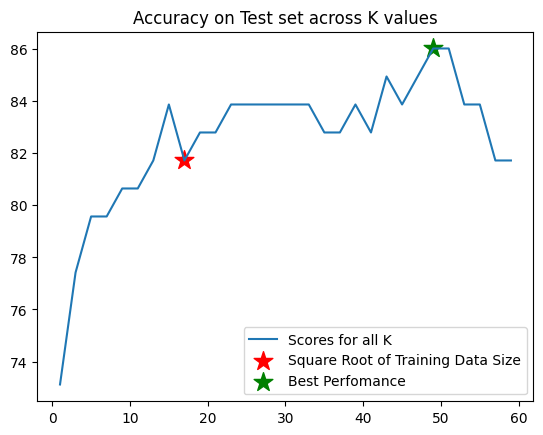

Top score of optimal classifier: 86.02150537634408
Optimal K 49


In [63]:
scores = {}
for n in range(1,60,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across K values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')


k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Optimal K " + str(best_k))

This model is barely more accurate than the original so lets try getting rid of batting average

In [64]:
featuresc = df_bb[["Hits","Home Runs"]]
labelc= df_bb["Hall of Fame"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(featuresc, labelc, test_size= 0.2, random_state =42)
bbmodelc = KNeighborsClassifier(n_neighbors= 4)
bbmodelc.fit(X_train, y_train)
bbpredictc = bbmodelc.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,bbpredictc))

Accuracy Score:  0.8387096774193549


{1: np.float64(73.11827956989248), 3: np.float64(77.41935483870968), 5: np.float64(79.56989247311827), 7: np.float64(79.56989247311827), 9: np.float64(80.64516129032258), 11: np.float64(80.64516129032258), 13: np.float64(81.72043010752688), 15: np.float64(83.87096774193549), 17: np.float64(81.72043010752688), 19: np.float64(82.79569892473118), 21: np.float64(82.79569892473118), 23: np.float64(83.87096774193549), 25: np.float64(83.87096774193549), 27: np.float64(83.87096774193549), 29: np.float64(83.87096774193549), 31: np.float64(83.87096774193549), 33: np.float64(83.87096774193549), 35: np.float64(82.79569892473118), 37: np.float64(82.79569892473118), 39: np.float64(83.87096774193549), 41: np.float64(82.79569892473118), 43: np.float64(84.94623655913979), 45: np.float64(83.87096774193549), 47: np.float64(84.94623655913979), 49: np.float64(86.02150537634408)}


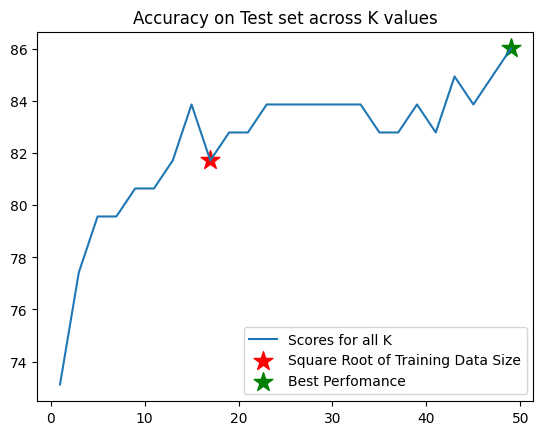

Top score of optimal classifier: 86.02150537634408
Optimal K 49


In [65]:
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across K values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')


k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Optimal K " + str(best_k))

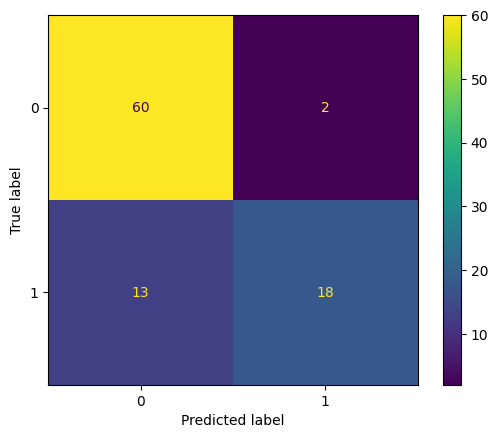

In [66]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,bbpredictc)

Its the same so lets just get rid of home Runs

In [67]:
featuresd = df_bb[["Hits"]]
labeld= df_bb["Hall of Fame"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(featuresd, labeld, test_size= 0.2, random_state =42)
bbmodeld = KNeighborsClassifier(n_neighbors= 37)
bbmodeld.fit(X_train, y_train)
bbpredictd = bbmodeld.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,bbpredictd))

Accuracy Score:  0.8494623655913979


{1: np.float64(65.59139784946237), 3: np.float64(79.56989247311827), 5: np.float64(83.87096774193549), 7: np.float64(82.79569892473118), 9: np.float64(82.79569892473118), 11: np.float64(83.87096774193549), 13: np.float64(80.64516129032258), 15: np.float64(80.64516129032258), 17: np.float64(81.72043010752688), 19: np.float64(81.72043010752688), 21: np.float64(82.79569892473118), 23: np.float64(82.79569892473118), 25: np.float64(83.87096774193549), 27: np.float64(80.64516129032258), 29: np.float64(80.64516129032258), 31: np.float64(79.56989247311827), 33: np.float64(81.72043010752688), 35: np.float64(82.79569892473118), 37: np.float64(84.94623655913979), 39: np.float64(82.79569892473118), 41: np.float64(83.87096774193549), 43: np.float64(83.87096774193549), 45: np.float64(81.72043010752688), 47: np.float64(81.72043010752688), 49: np.float64(81.72043010752688)}


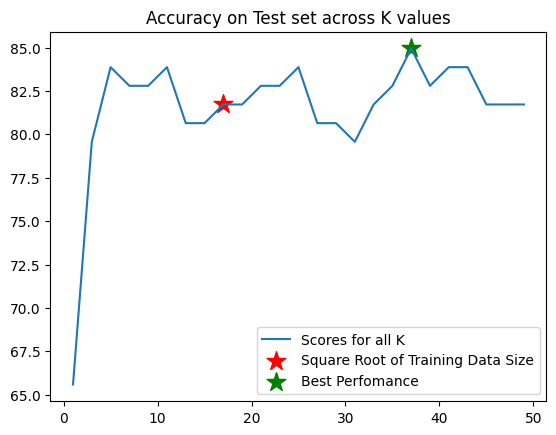

Top score of optimal classifier: 84.94623655913979
Optimal K 37


In [68]:
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across K values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')


k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Optimal K " + str(best_k))

In [ ]:

metrics.ConfusionMatrixDisplay.from_predictions(y_test,bbpredictd)

For this model I will use batting average only

In [69]:
featuresbat = df_bb[["Batting Average"]]
labelbat= df_bb["Hall of Fame"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(featuresbat, labelbat, test_size= 0.2, random_state =42)
bbmodelbat = KNeighborsClassifier(n_neighbors= 11)


In [70]:
bbmodelbat.fit(X_train, y_train)
bbpredictbat = bbmodelbat.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,bbpredictbat))

Accuracy Score:  0.7526881720430108


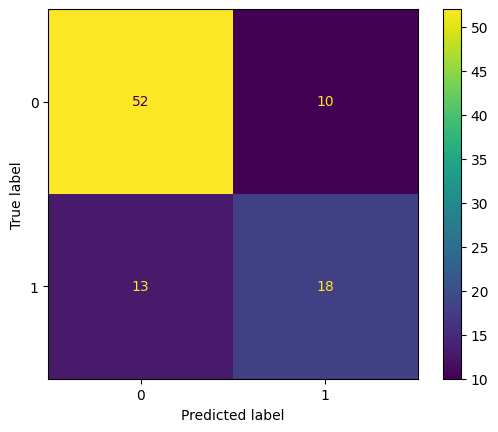

In [71]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,bbpredictbat)

For this model I will use runs only

In [72]:
featuresrun = df_bb[["Runs"]]
labelrun= df_bb["Hall of Fame"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(featuresrun, labelrun, test_size= 0.2, random_state =42)
bbmodelrun = KNeighborsClassifier(n_neighbors= 4)
bbmodelrun.fit(X_train, y_train)
bbpredictrun = bbmodelrun.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,bbpredictrun))

Accuracy Score:  0.8064516129032258


{1: np.float64(72.04301075268818), 3: np.float64(82.79569892473118), 5: np.float64(83.87096774193549), 7: np.float64(84.94623655913979), 9: np.float64(81.72043010752688), 11: np.float64(81.72043010752688), 13: np.float64(80.64516129032258), 15: np.float64(78.49462365591397), 17: np.float64(79.56989247311827), 19: np.float64(79.56989247311827), 21: np.float64(80.64516129032258), 23: np.float64(80.64516129032258), 25: np.float64(82.79569892473118), 27: np.float64(81.72043010752688), 29: np.float64(79.56989247311827), 31: np.float64(79.56989247311827), 33: np.float64(78.49462365591397), 35: np.float64(80.64516129032258), 37: np.float64(80.64516129032258), 39: np.float64(80.64516129032258), 41: np.float64(80.64516129032258), 43: np.float64(80.64516129032258), 45: np.float64(80.64516129032258), 47: np.float64(80.64516129032258), 49: np.float64(80.64516129032258)}


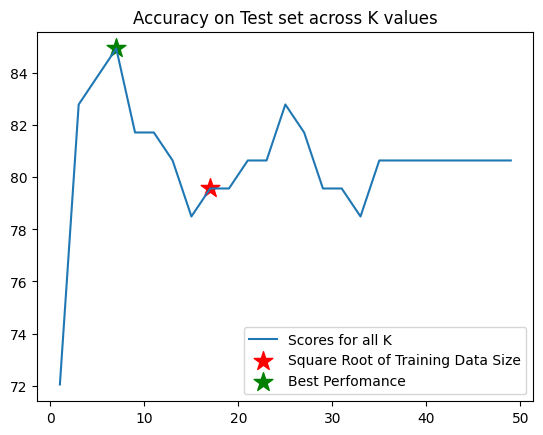

Top score of optimal classifier: 84.94623655913979
Optimal K 7


In [73]:
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across K values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')


k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Optimal K " + str(best_k))

This model I will use all the variables I can possible use

In [74]:
featuresall = df_bb.drop(columns = ['Player','Hall of Fame','Batting Average','Doubles','Triples','Games Played'])
labelall= df_bb["Hall of Fame"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(featuresall, labelall, test_size= 0.2, random_state =42)
bbmodelall = KNeighborsClassifier(n_neighbors= 4)
bbmodelall.fit(X_train, y_train)
bbpredictall = bbmodelall.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,bbpredictall))

Accuracy Score:  0.8064516129032258


In [75]:
df_bb.head()

,Player,Years Played,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Walks,Stolen Bases,Batting Average,Hall of Fame
0,Ty Cobb,24,3035,11434,2246,4189,724,295,117,1249,892,0.366,1
1,Stan Musial,22,3026,10972,1949,3630,725,177,475,1599,78,0.331,1
2,Tris Speaker,22,2789,10195,1882,3514,792,222,117,1381,432,0.345,1
3,Derek Jeter,20,2747,11195,1923,3465,544,66,260,1082,358,0.310,1
4,Honus Wagner,21,2792,10430,1736,3430,640,252,101,963,722,0.329,1


{1: np.float64(82.79569892473118), 3: np.float64(83.87096774193549), 5: np.float64(81.72043010752688), 7: np.float64(83.87096774193549), 9: np.float64(81.72043010752688), 11: np.float64(82.79569892473118), 13: np.float64(81.72043010752688), 15: np.float64(83.87096774193549), 17: np.float64(81.72043010752688), 19: np.float64(81.72043010752688), 21: np.float64(81.72043010752688), 23: np.float64(82.79569892473118), 25: np.float64(82.79569892473118), 27: np.float64(82.79569892473118), 29: np.float64(82.79569892473118), 31: np.float64(80.64516129032258), 33: np.float64(80.64516129032258), 35: np.float64(81.72043010752688), 37: np.float64(80.64516129032258), 39: np.float64(80.64516129032258), 41: np.float64(80.64516129032258), 43: np.float64(81.72043010752688), 45: np.float64(82.79569892473118), 47: np.float64(80.64516129032258), 49: np.float64(80.64516129032258)}


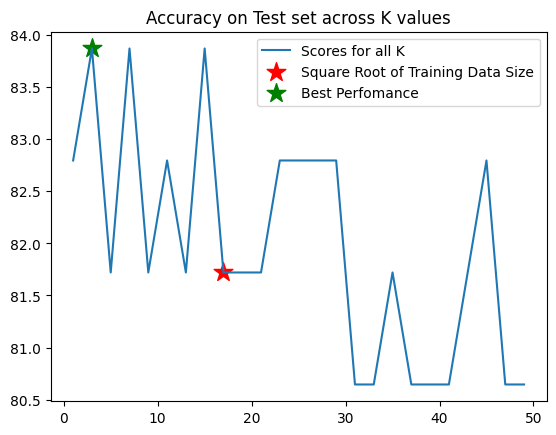

Top score of optimal classifier: 83.87096774193549
Optimal K 3


In [76]:
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across K values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')


k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()
print("Top score of optimal classifier: " + str(top_score))
print("Optimal K " + str(best_k))

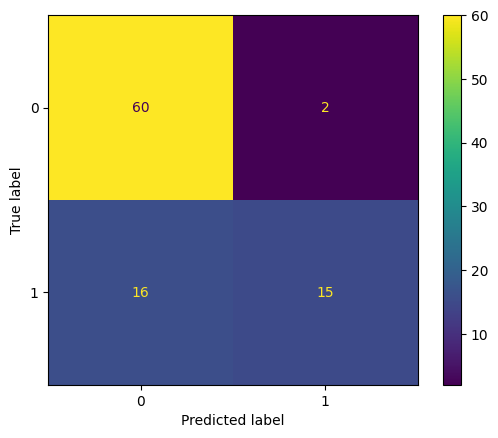

In [77]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,bbpredictall)

I am now going to remmake the models with the standardized data

In [89]:
features2 = df_bbstd[["Hits","Batting Average",]]
label2= df_bb["Hall of Fame"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(features2, label2, test_size= 0.2, random_state =42)
bbmodel2 = KNeighborsClassifier(n_neighbors= 5)
bbmodel2.fit(X_train, y_train)
bb2predict = bbmodel2.predict(X_test)
print("Accuracy Score: ", metrics.accuracy_score(y_test,bb2predict))

Accuracy Score:  0.8817204301075269


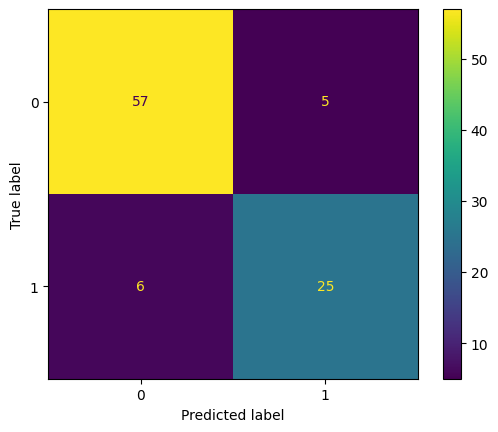

In [90]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,bb2predict)

{1: np.float64(81.72043010752688), 3: np.float64(81.72043010752688), 5: np.float64(88.17204301075269), 7: np.float64(87.09677419354838), 9: np.float64(87.09677419354838), 11: np.float64(86.02150537634408), 13: np.float64(84.94623655913979), 15: np.float64(84.94623655913979), 17: np.float64(81.72043010752688), 19: np.float64(83.87096774193549), 21: np.float64(87.09677419354838), 23: np.float64(86.02150537634408), 25: np.float64(84.94623655913979), 27: np.float64(84.94623655913979), 29: np.float64(83.87096774193549), 31: np.float64(84.94623655913979), 33: np.float64(84.94623655913979), 35: np.float64(84.94623655913979), 37: np.float64(84.94623655913979), 39: np.float64(84.94623655913979), 41: np.float64(86.02150537634408), 43: np.float64(86.02150537634408), 45: np.float64(84.94623655913979), 47: np.float64(84.94623655913979), 49: np.float64(84.94623655913979)}


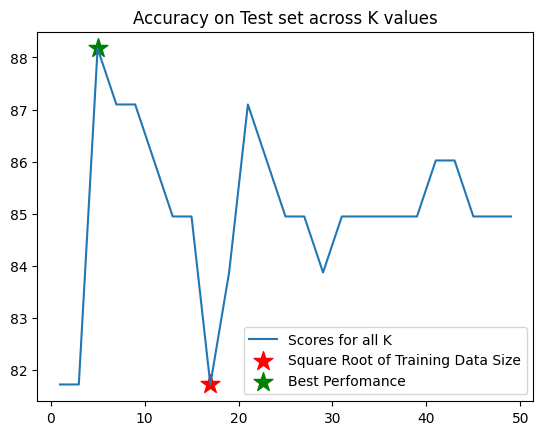

Top score of optimal classifier: 88.17204301075269
Optimal K 5


In [91]:
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across K values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')


k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Optimal K " + str(best_k))


Home Runs, Batting Average, Hits

In [95]:
featuresb = df_bbstd[["Hits","Batting Average","Home Runs"]]
labelb= df_bb["Hall of Fame"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(featuresb, labelb, test_size= 0.2, random_state =42)
bbmodel3v = KNeighborsClassifier(n_neighbors=5)
bbmodel3v.fit(X_train, y_train)
bb3vpredict = bbmodel3v.predict(X_test)
print("Accuracy Score", metrics.accuracy_score(y_test,bb3vpredict))

Accuracy Score 0.9139784946236559


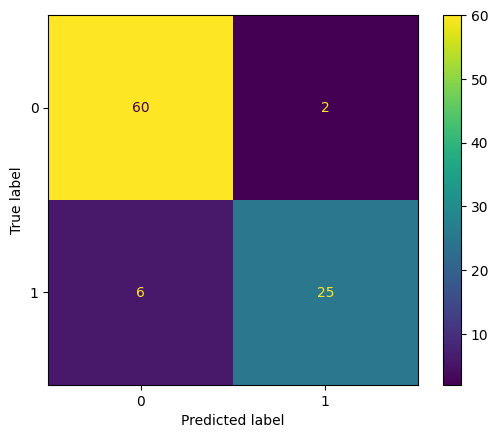

In [97]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,bb3vpredict)

{1: np.float64(80.64516129032258), 3: np.float64(83.87096774193549), 5: np.float64(91.39784946236558), 7: np.float64(86.02150537634408), 9: np.float64(87.09677419354838), 11: np.float64(87.09677419354838), 13: np.float64(88.17204301075269), 15: np.float64(88.17204301075269), 17: np.float64(86.02150537634408), 19: np.float64(87.09677419354838), 21: np.float64(86.02150537634408), 23: np.float64(84.94623655913979), 25: np.float64(86.02150537634408), 27: np.float64(87.09677419354838), 29: np.float64(86.02150537634408), 31: np.float64(84.94623655913979), 33: np.float64(84.94623655913979), 35: np.float64(84.94623655913979), 37: np.float64(84.94623655913979), 39: np.float64(83.87096774193549), 41: np.float64(83.87096774193549), 43: np.float64(84.94623655913979), 45: np.float64(84.94623655913979), 47: np.float64(84.94623655913979), 49: np.float64(83.87096774193549)}


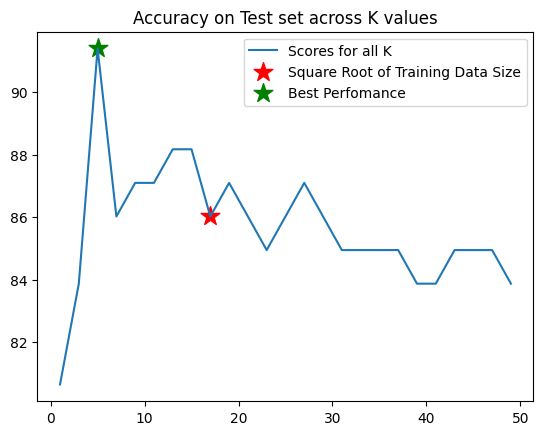

Top score of optimal classifier: 91.39784946236558
Optimal K 5


In [98]:
scores = {}
for n in range(1,50,2):
    full_model = KNeighborsClassifier(n_neighbors = n)
    full_model.fit(X_train, y_train.to_numpy().reshape(-1))
    pred = full_model.predict(X_test)
    score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
    scores[n] = score


plt.title("Accuracy on Test set across K values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')


k = int(len(X_train)**(1/2)/2)*2 - 1
full_model = KNeighborsClassifier(n_neighbors = k)
full_model.fit(X_train, y_train.to_numpy().reshape(-1))
pred = full_model.predict(X_test)
score = sum(pred == y_test.to_numpy().reshape(-1))/len(pred)* 100
plt.scatter([k], [score], color = 'r', marker = '*', s = 200, label = 'Square Root of Training Data Size')


top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')

plt.legend()
plt.show()



# PRINTING THE RESULTS
print("Top score of optimal classifier: " + str(top_score))
print("Optimal K " + str(best_k))

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (93,).